In [428]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import norm, probplot
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
%matplotlib inline

In [429]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [430]:
# 先保存两个ID，最后输出结果可以使用
train_id = train['Id']
test_id = test['Id']

In [431]:
# 删去Id列
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)
# 记录训练集的数目
n_train = len(train)
n_test = len(test)

In [432]:
# 训练集多出来的一列是我们的目标变量：SalePrice
print('The shape of the train set data: {}'.format(train.shape))
print('The shape of the test set data: {}'.format(test.shape))

The shape of the train set data: (1460, 80)
The shape of the test set data: (1459, 79)


Text(0.5,0,'GrLivArea')

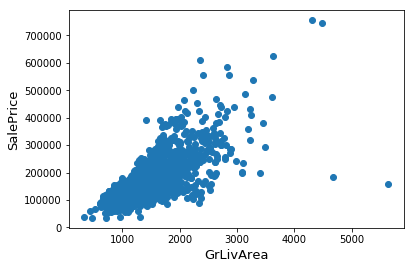

In [433]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)

Text(0.5,0,'GrLivArea')

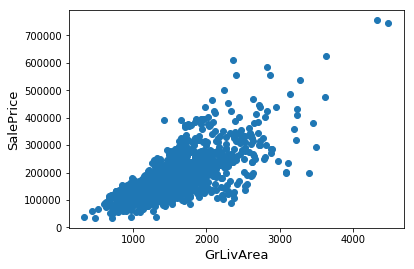

In [434]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74213.25959976624, 180932.91906721535, 0.9320154492892367))

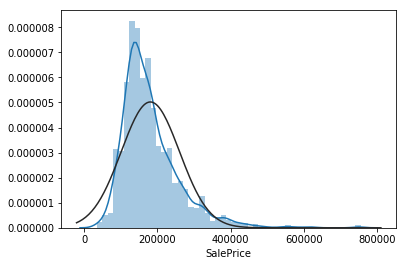

In [435]:
sns.distplot(train['SalePrice'], fit=norm)
fig = plt.figure()
probplot(train['SalePrice'])

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([10.46027076, 10.47197813, 10.54273278, ..., 13.34550853,
         13.52114084, 13.53447435])),
 (0.3985294832980731, 12.024015155682548, 0.9953918721417083))

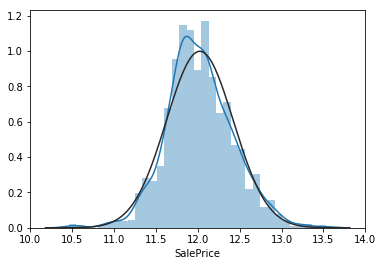

In [436]:
train['SalePrice'] = np.log1p(train['SalePrice'])
sns.distplot(train['SalePrice'], fit=norm)
fig = plt.figure()
probplot(train['SalePrice'])

In [437]:
# 提取目标变量
y_train = train['SalePrice']
# 连接两个数据集(测试集会生成SalePrice列于与训练集对齐)
data = pd.concat([train, test], axis=0)
data.drop(['SalePrice'], axis=1, inplace=True)
print(data.shape)

(2917, 79)


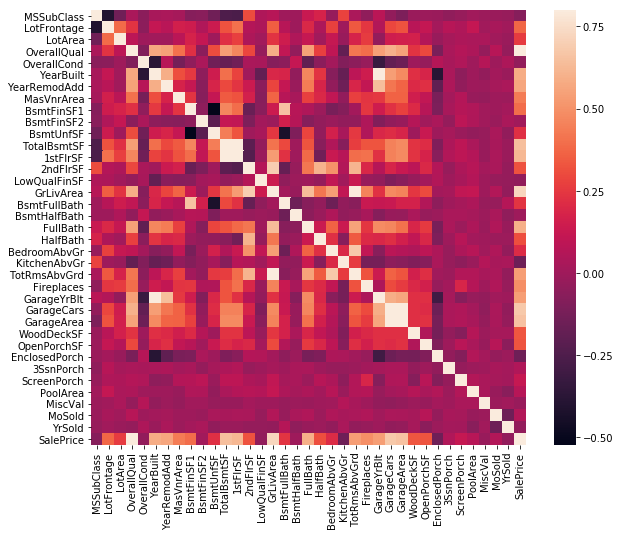

In [438]:
# 绘制关联矩阵
fig = plt.figure(figsize=(10, 8))
corrmat = train.corr()
sns.heatmap(corrmat, vmax=.8, square=True)

In [439]:
corrmat['SalePrice'].nlargest(20)

SalePrice       1.000000
OverallQual     0.821405
GrLivArea       0.725211
GarageCars      0.681033
GarageArea      0.656129
TotalBsmtSF     0.647563
1stFlrSF        0.620500
FullBath        0.595899
YearBuilt       0.587043
YearRemodAdd    0.565992
GarageYrBlt     0.541638
TotRmsAbvGrd    0.537702
Fireplaces      0.491998
MasVnrArea      0.434621
BsmtFinSF1      0.392283
LotFrontage     0.372900
WoodDeckSF      0.334251
OpenPorchSF     0.325215
2ndFlrSF        0.319953
HalfBath        0.314186
Name: SalePrice, dtype: float64

In [440]:
large_cor_columns = corrmat['SalePrice'].nlargest(15).index
cormat_top_15 = train[large_cor_columns].corr()

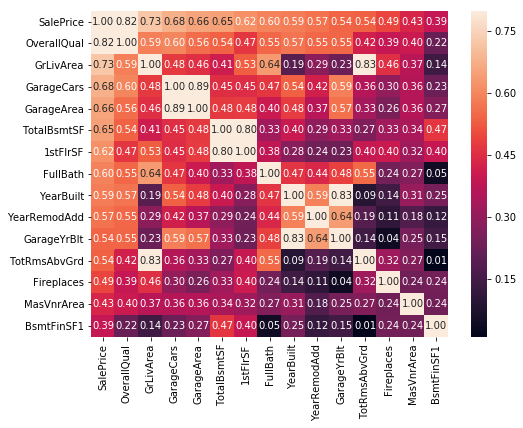

In [441]:
fig = plt.figure(figsize=(8, 6))
sns.heatmap(cormat_top_15, vmax=.8, annot=True, fmt='.2f')

In [442]:
NA_total = data.isnull().sum()
total = len(data)
NA_percent = (NA_total / total) * 100
missing_data = NA_percent[NA_percent > 0].sort_values(ascending=False)[:30]
missing_data.head(20)

PoolQC          99.691464
MiscFeature     96.400411
Alley           93.212204
Fence           80.425094
FireplaceQu     48.680151
LotFrontage     16.660953
GarageQual       5.450806
GarageCond       5.450806
GarageFinish     5.450806
GarageYrBlt      5.450806
GarageType       5.382242
BsmtExposure     2.811107
BsmtCond         2.811107
BsmtQual         2.776826
BsmtFinType2     2.742544
BsmtFinType1     2.708262
MasVnrType       0.822763
MasVnrArea       0.788481
MSZoning         0.137127
BsmtFullBath     0.068564
dtype: float64

Text(0,0.5,'percent of missing values')

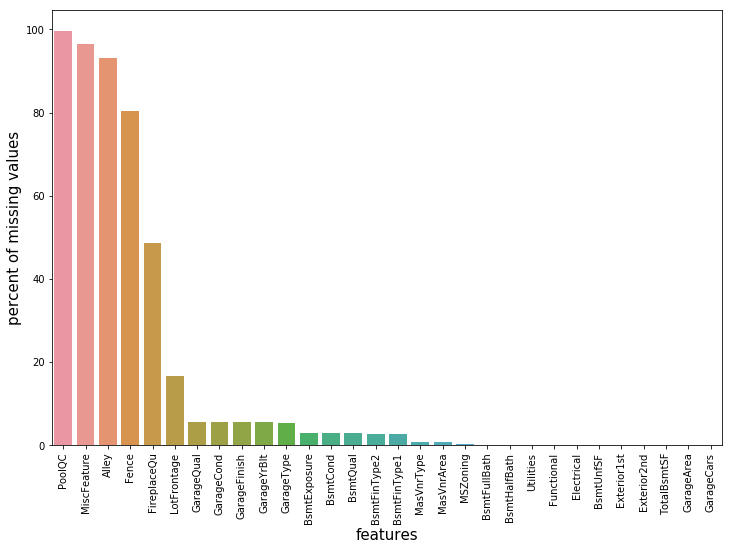

In [443]:
plt.figure(figsize=(12, 8))
sns.barplot(x=missing_data.index, y=missing_data)
plt.xticks(rotation=90)
plt.xlabel("features", fontsize=15)
plt.ylabel("percent of missing values", fontsize=15)

NA代表没有游泳池，因此有99%的房屋没有游泳池，对于极少数的那部分区分度很高
** count函数统计非空观察点的数目 **

In [444]:
print(data['PoolQC'].unique(), data['PoolQC'].count())

[nan 'Ex' 'Fa' 'Gd'] 9


In [445]:
data['PoolQC'] = data['PoolQC'].fillna('None')
print(data['PoolQC'].unique(), data['PoolQC'].count())

['None' 'Ex' 'Fa' 'Gd'] 2917


In [446]:
# 同理
print(data['MiscFeature'].unique(), data['MiscFeature'].count())

[nan 'Shed' 'Gar2' 'Othr' 'TenC'] 105


In [447]:
data['MiscFeature'] = data['MiscFeature'].fillna('None')
print(data['MiscFeature'].unique(), data['MiscFeature'].count())

['None' 'Shed' 'Gar2' 'Othr' 'TenC'] 2917


In [448]:
print(data['Alley'].unique(), data['Alley'].count())
data['Alley'] = data['Alley'].fillna('None')
print(data['Alley'].unique(), data['Alley'].count())

[nan 'Grvl' 'Pave'] 198
['None' 'Grvl' 'Pave'] 2917


In [449]:
print(data['Fence'].unique(), data['Fence'].count())
data['Fence'] = data['Fence'].fillna('None')
print(data['Fence'].unique(), data['Fence'].count())

[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw'] 571
['None' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw'] 2917


In [450]:
print(data['FireplaceQu'].unique(), data['FireplaceQu'].count())
data['FireplaceQu'] = data['FireplaceQu'].fillna('None')
print(data['FireplaceQu'].unique(), data['FireplaceQu'].count())

[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po'] 1497
['None' 'TA' 'Gd' 'Fa' 'Ex' 'Po'] 2917


+ LotFrontage：房屋的面积很可能与其附近的其他房屋具有相似的面积，所以我们可以通过邻里的LotFrontage填充缺失值。
+ 使用groupby函数，但要注意使用时一定要配合某个聚合函数才有效，跟sql是一样的，例如sum，avg，count等

In [451]:
data.groupby('Neighborhood')['LotFrontage'].count()

Neighborhood
Blmngtn     20
Blueste     10
BrDale      30
BrkSide     95
ClearCr     20
CollgCr    220
Crawfor     83
Edwards    176
Gilbert    111
IDOTRR      87
MeadowV     33
Mitchel     90
NAmes      375
NPkVill     21
NWAmes      85
NoRidge     54
NridgHt    163
OldTown    229
SWISU       44
Sawyer      98
SawyerW    106
Somerst    162
StoneBr     46
Timber      57
Veenker     16
Name: LotFrontage, dtype: int64

+ pd.core.groupby.DataFrameGroupBy.transform()，传入一个函数，并将该函数在每个分组上调用，返回值是填充了转换值的的DataFrame，下面的例子中x代表每个Neighborhood分组

In [452]:
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [453]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    print(data[col].unique(), data[col].count())
    data[col] = data[col].fillna('None')
    print(data[col].unique(), data[col].count())

['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types'] 2760
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'None' 'Basment' '2Types'] 2917
['RFn' 'Unf' 'Fin' nan] 2758
['RFn' 'Unf' 'Fin' 'None'] 2917
['TA' 'Fa' 'Gd' nan 'Ex' 'Po'] 2758
['TA' 'Fa' 'Gd' 'None' 'Ex' 'Po'] 2917
['TA' 'Fa' nan 'Gd' 'Po' 'Ex'] 2758
['TA' 'Fa' 'None' 'Gd' 'Po' 'Ex'] 2917


 没有停车场，就没有车库，也没有所谓建造日期

In [454]:
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    data[col] = data[col].fillna(0)

+ BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : 缺失值代表0个地下室

In [455]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data[col] = data[col].fillna(0)

+ BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2与地下室有关的类别特征，没有地下室就没有这些特征，用None填充

In [456]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    print(data[col].unique(), data[col].count())
    data[col] = data[col].fillna('None')
    print(data[col].unique(), data[col].count())
# data.loc[data[col]==0, col] = 'None'

['Gd' 'TA' 'Ex' nan 'Fa'] 2836
['Gd' 'TA' 'Ex' 'None' 'Fa'] 2917
['TA' 'Gd' nan 'Fa' 'Po'] 2835
['TA' 'Gd' 'None' 'Fa' 'Po'] 2917
['No' 'Gd' 'Mn' 'Av' nan] 2835
['No' 'Gd' 'Mn' 'Av' 'None'] 2917
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ'] 2838
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'None' 'LwQ'] 2917
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ'] 2837
['Unf' 'BLQ' 'None' 'ALQ' 'Rec' 'LwQ' 'GLQ'] 2917


+ MasVnrArea和MasVnrType : 没有砖石饰面面积填充为0，类型填充为None

In [457]:
data["MasVnrType"] = data["MasVnrType"].fillna("None")
data["MasVnrArea"] = data["MasVnrArea"].fillna(0)

+ MSZoning : 最常见的值为RL，填充为众数

In [458]:
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])

AllPub 2916，NoSeWa 1，NA 2，下面这个特征区分度太小，直接删除

In [459]:
for value in data['Utilities'].unique():
    # NA就是float类型
    if type(value) != float:
        print(value, data[data['Utilities'] == value]['Utilities'].count())

AllPub 2914
NoSeWa 1


In [460]:
data.drop(['Utilities'], axis=1, inplace=True)

Functional : NA代表典型

In [461]:
data["Functional"] = data["Functional"].fillna("Typ")
print(data['Functional'].unique(), data['Functional'].count())

['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev'] 2917


Electrical : 只有一个NA值. 且大多数值 'SBrkr', 缺失值填充众数.

In [462]:
for value in data['Electrical'].unique():
    if type(value) != float:
        print(value, data[data['Electrical'] == value]['Electrical'].count())

SBrkr 2669
FuseF 50
FuseA 188
FuseP 8
Mix 1


In [463]:
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

KitchenQual: 和Electrical一样只有一个缺失值, 设为众数TA

In [464]:
data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])

In [465]:
# 同理
data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])

In [466]:
# 同理，填充WD众数
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])

In [467]:
data['MSSubClass'] = data['MSSubClass'].fillna("None")

In [468]:
NA_total = data.isnull().sum()
total = len(data)
NA_percent = (NA_total / total) * 100
missing_data = NA_percent[NA_percent > 0].sort_values(ascending=False)[:30]
missing_data.head(20)

Series([], dtype: float64)

把一些类别变量（原本是数值型）转换为字符串，为后面的编码做准备

In [469]:
data['MSSubClass'] = data['MSSubClass'].apply(str)
data['OverallCond'] = data['OverallCond'].astype(str)
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

In [470]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for col in cols:
    lb = LabelEncoder() 
    lb.fit(data[col].values) 
    data[col] = lb.transform(data[col].values)

# shape        
print('Shape all_data: {}'.format(data.shape))

Shape all_data: (2917, 78)


In [471]:
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

计算数值特征的偏度

In [472]:
num_feats = data.dtypes[data.dtypes != 'object'].index
skewness = data[num_feats].skew().sort_values(ascending=False)
skewness.head(10)

MiscVal          21.950962
PoolArea         17.697766
LotArea          13.116240
LowQualFinSF     12.090757
3SsnPorch        11.377932
LandSlope         4.975813
KitchenAbvGr      4.302763
BsmtFinSF2        4.146636
EnclosedPorch     4.004404
ScreenPorch       3.947131
dtype: float64

对高偏度的特征进行Box Cox Transformation

scipy函数使用boxcox1p计算Box-Cox transformation（ $1+x$） 

如果设置$λ=0$等价于log1p.

In [473]:
# 左偏右偏0.75
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

There are 36 skewed numerical features to Box Cox transform


In [474]:
from scipy.special import boxcox1p
skewed_features = skewness.index
lambd = 0.15
for feat in skewed_features:
    data[feat] = boxcox1p(data[feat], lambd)

In [475]:
data = pd.get_dummies(data)
print(data.shape)

(2917, 220)


In [476]:
train = data[:-n_test]
test = data[-n_test:]
y_train = y_train.values

In [477]:
def get_outliers(data):
    Q1 = data.quantile(0.25)
    Q2 = data.quantile(0.50)
    Q3 = data.quantile(0.75)
    delta_Q = Q3 - Q1
    lower, upper = Q1 - 1.5*delta_Q, Q3 + 1.5*delta_Q
    return lower, upper

In [478]:
lower, upper = get_outliers(data['GrLivArea'])
print(lower, upper)

10.520396912927186 15.699488506669493


In [479]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [480]:
#Validation function
n_folds = 5

def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [481]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [482]:
score = rmse_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1103 (0.0072)



In [483]:
score = rmse_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1102 (0.0072)



In [484]:
score = rmse_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1780 (0.0067)



In [485]:
score = rmse_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1177 (0.0080)



In [486]:
score = rmse_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1159 (0.0078)



In [487]:
score = rmse_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1154 (0.0074)



In [488]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [489]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmse_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1136 (0.0077)



In [499]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [500]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmse_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1080 (0.0076)


In [492]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [493]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmse(y_train, stacked_train_pred))

0.08038355154748833


In [494]:
model_xgb.fit(train.values, y_train)
xgb_train_pred = model_xgb.predict(train.values)
xgb_pred = np.expm1(model_xgb.predict(test.values))
print(rmse(y_train, xgb_train_pred))

0.0785165142425036


In [495]:
model_lgb.fit(train.values, y_train)
lgb_train_pred = model_lgb.predict(train.values)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmse(y_train, lgb_train_pred))

0.07209635881149423


In [496]:
print('RMSE score on train data:')
print(rmse(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSE score on train data:
0.07681730986001842


In [497]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [498]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)

**reference: **[https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard)